In [1]:
import pandas as pd
import os
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from IPython.display import HTML
### Testing For Stationarity
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [81]:

data = pd.read_csv("aq_milan_summer_2020.csv",index_col='local_datetime',delimiter=',',parse_dates=True)
#If count is zero then data count is actaully 1
data.head()

,pm2p5
local_datetime,
2020-07-24 18:00:00,11.67
2020-07-24 19:00:00,9.25
2020-07-24 20:00:00,6.29
2020-07-24 21:00:00,5.50
2020-07-24 22:00:00,9.50


In [82]:
data.head()

,pm2p5
local_datetime,
2020-07-24 18:00:00,11.67
2020-07-24 19:00:00,9.25
2020-07-24 20:00:00,6.29
2020-07-24 21:00:00,5.50
2020-07-24 22:00:00,9.50


In [83]:
data.reset_index(inplace=True)
print(data['local_datetime'].max())
print(data['local_datetime'].min())

2020-09-20 23:00:00
2020-07-24 18:00:00


In [85]:
data.dtypes

local_datetime    datetime64[ns]
pm2p5                    float64
day                        int64
dtype: object

In [91]:
#data['day'] = data['local_datetime'].dt.day
#data['hour'] = data['local_datetime'].dt.hour
data['month'] = data['local_datetime'].dt.month

In [80]:
data.head()

,pm2p5,day
hour,,
18,11.67,24
19,9.25,24
20,6.29,24
21,5.50,24
22,9.50,24


In [93]:
data.set_index(['hour'],inplace=True)
#data.drop(columns=['level_0','index','predict','forecast'],inplace=True)
#day14 = data[data['day']== ]

<AxesSubplot:xlabel='hour'>

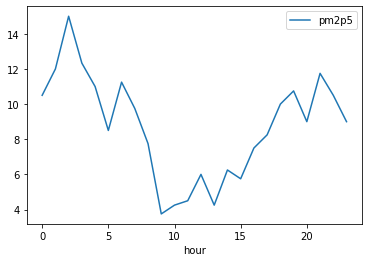

In [96]:
day16 = data[(data['day']== 16) & (data['month']== 8)]
day16[['pm2p5']].plot()

In [90]:
print(day16.head(1300))

          local_datetime  pm2p5  day  hour
486  2020-08-14 00:00:00  10.00   14     0
487  2020-08-14 01:00:00  11.00   14     1
488  2020-08-14 02:00:00  10.00   14     2
489  2020-08-14 03:00:00  10.50   14     3
490  2020-08-14 04:00:00   9.00   14     4
491  2020-08-14 05:00:00  13.25   14     5
492  2020-08-14 06:00:00  12.50   14     6
493  2020-08-14 07:00:00  13.50   14     7
494  2020-08-14 08:00:00  12.25   14     8
495  2020-08-14 09:00:00  13.50   14     9
496  2020-08-14 10:00:00   9.00   14    10
497  2020-08-14 11:00:00  10.25   14    11
498  2020-08-14 12:00:00   7.25   14    12
499  2020-08-14 13:00:00   8.50   14    13
500  2020-08-14 14:00:00   9.25   14    14
501  2020-08-14 15:00:00   7.50   14    15
502  2020-08-14 16:00:00   7.00   14    16
503  2020-08-14 17:00:00   6.00   14    17
504  2020-08-14 18:00:00  10.25   14    18
505  2020-08-14 19:00:00   9.00   14    19
506  2020-08-14 20:00:00   8.50   14    20
507  2020-08-14 21:00:00   8.25   14    21
508  2020-0

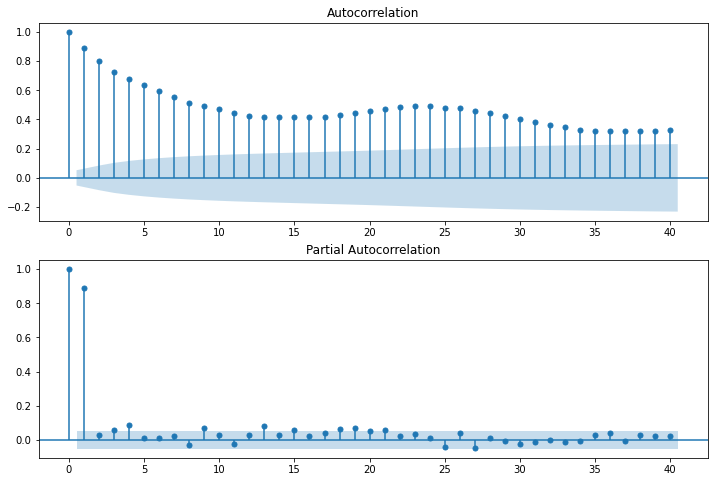

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['pm2p5'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['pm2p5'],lags=40,ax=ax2)

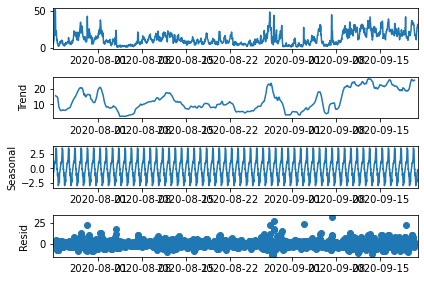

In [16]:
decomposition = sm.tsa.seasonal_decompose(data,model='additive')
fig= decomposition.plot()
plt.show()

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(count):
    result=adfuller(count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(data['pm2p5'])

ADF Test Statistic : -2.7488924633053893
p-value : 0.06595307292193427
#Lags Used : 20
Number of Observations Used : 1377
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [156]:
data.head()

,pm2p5
local_datetime,
2020-07-24 18:00:00,11.67
2020-07-24 19:00:00,9.25
2020-07-24 20:00:00,6.29
2020-07-24 21:00:00,5.50
2020-07-24 22:00:00,9.50


In [155]:

#data.drop(columns=['day','month'],inplace=True)
train_data = data.iloc[:len(data)-24]
test_data = data.iloc[len(data)-24:]

In [24]:
model= ARIMA(train_data,order=(10,0,2)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [31]:
data['predict'] = model.predict(start=len(train_data),end=(len(data)-1))

<AxesSubplot:xlabel='local_datetime'>

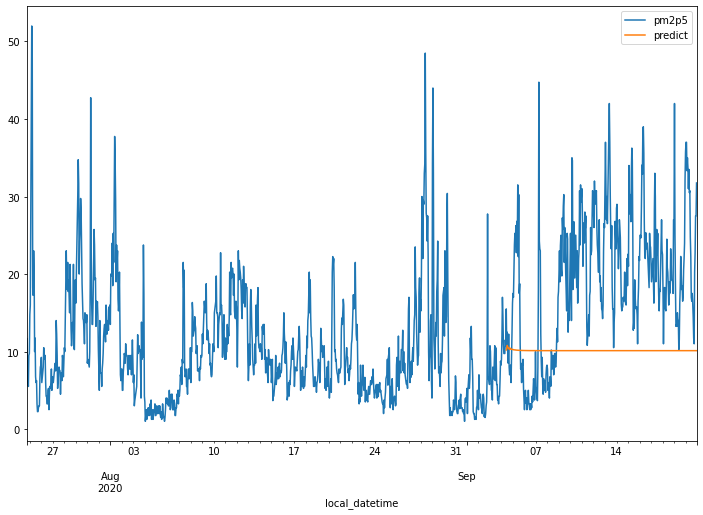

In [32]:
data[['pm2p5','predict']].plot(figsize=(12,8))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='local_datetime'>

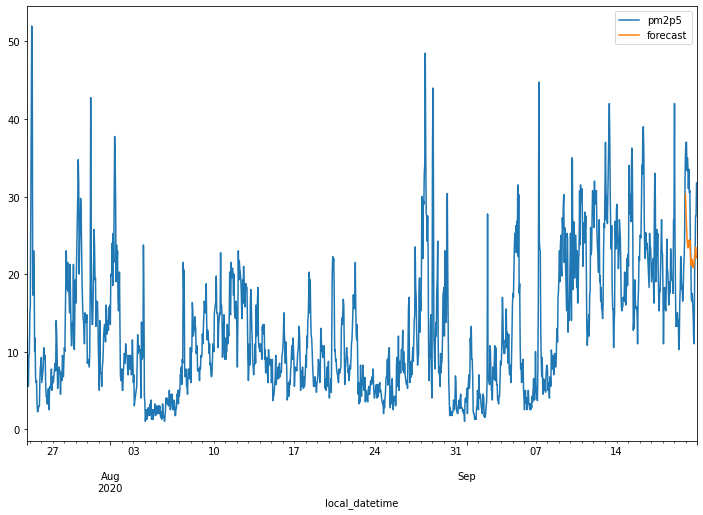

In [188]:
model=sm.tsa.statespace.SARIMAX(data['pm2p5'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data['forecast']=results.predict(start=len(train_data),end=(len(data)-1),dynamic=True)
data[['pm2p5','forecast']].plot(figsize=(12,8))

In [189]:
data.head()

,pm2p5,forecast
local_datetime,,
2020-07-24 18:00:00,11.67,NaN
2020-07-24 19:00:00,9.25,NaN
2020-07-24 20:00:00,6.29,NaN
2020-07-24 21:00:00,5.50,NaN
2020-07-24 22:00:00,9.50,NaN


<AxesSubplot:xlabel='local_datetime'>

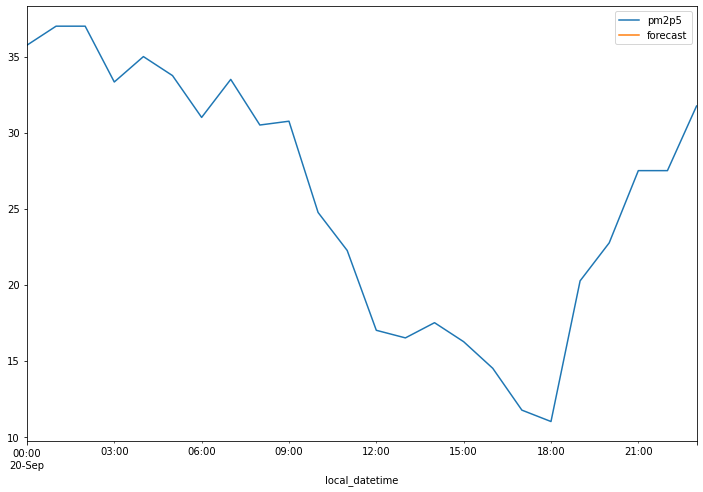

In [180]:

test_data[['pm2p5','forecast']].plot(figsize=(12,8))

In [36]:
from sklearn.metrics import mean_squared_error

In [176]:
error = np.sqrt(mean_squared_error(test_data['pm2p5'],pred))
error

7.473859456477884

In [177]:
test_data.mean(),np.sqrt(test_data.var())

(pm2p5    25.784583
 dtype: float64,
 pm2p5    8.471154
 dtype: float64)

In [130]:
import pmdarima as pm

In [148]:
data.drop(columns=['forecast'],inplace=True,axis=1)

In [152]:
len(train_data)

1374

## Using auto arims

In [166]:
model = pm.auto_arima(train_data, seasonal=True, m=12)

In [167]:
forecasts=model.predict(24)

In [168]:
pred

array([29.74762012, 29.08448321, 26.26703233, 24.89287787, 23.91782143,
       23.36016674, 23.02247335, 22.69500068, 22.03566718, 21.64774377,
       21.00905549, 20.41583285, 20.88962015, 21.24192371, 21.47601527,
       21.29416844, 21.08917204, 21.11669642, 20.97668999, 21.08033829,
       21.35083087, 21.47906948, 21.63892032, 22.27749924])

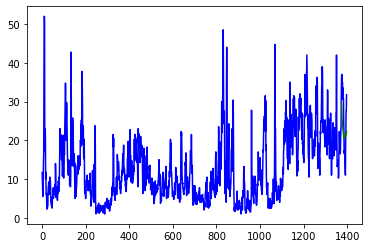

In [170]:
x = np.arange(1398)
plt.plot(x[:1398], data, c='blue')
plt.plot(x[(1398-24):], forecasts, c='green')
plt.show()